<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module3_Part6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Part 6 Python: Data Verb - JOIN (Outer)

The following python packages will be used for this notebook.

In [2]:
import pandas as pd
import numpy as np

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 3.6.P
For this notebook, we will consider data from a study on stress and workplace violence. 

Google Version of Survey:  https://forms.gle/urzhGs7QobquQYst9

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Preparing Pre Data

In [3]:
Pre = pd.read_csv("/content/sample_data/PreSurveys.csv") 

What is the size of the dataframe?

In [9]:
Pre.shape

(1255, 27)

### Aside: Google Sheet Style Output in Colab

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

The following extension can be used to preview data via a Google Sheet structure inside of Colab.

In [ ]:
%load_ext google.colab.data_table

The following command can be used to unload this extension from this session of Colab.

In [ ]:
%unload_ext google.colab.data_table

<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

### Using the Google Sheet Style Extension

In [ ]:
Pre

## Brute Force Approach to Recode

We will make extensive use of the <strong>dfply</strong> package in our analysis.

In [7]:
pip install dfply

     |████████████████████████████████| 614kB 4.4MB/s 


Next, import the dfply package into this session of Colab.

In [8]:
from dfply import *

### Converting Question #1 Outcomes to Numeric

<table>
<tr>
  <td align="left" colspan="7"><strong>Question #1</strong>: How often do you get the support you need from your immediate supervisor?</td>
</tr>
<tr>
  <td align="right"><strong>Response:</strong></td>
  <td align="center">Always</td>
  <td align="center">Often</td>
  <td align="center">Sometimes</td>
  <td align="center">Seldom</td>
  <td align="center">Hardly Ever</td>
  <td align="center">I do not <br>have a supervisor</td>
</tr>
<tr>
  <td align="right"><strong>Score:</strong></td>
  <td align="center">5</td>
  <td align="center">4</td>
  <td align="center">3</td>
  <td align="center">2</td>
  <td align="center">1</td>  
  <td align="center">NaN</td>  
  
</tr>

</table>


In [40]:
Pre_Updated = (
                 Pre
                 >> mutate(Q1_1_Numeric = case_when(
                                                      [X.Q1_1 == 'Always', 5.0],
                                                      [X.Q1_1 == 'Often', 4.0],
                                                      [X.Q1_1 == 'Sometimes', 3.0],
                                                      [X.Q1_1 == 'Seldom', 2.0],
                                                      [X.Q1_1 == 'Hardly Ever', 1.0],
                                                      [X.Q1_1 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )
               )

Pre_Updated

,RowID,Date,surveyLinkID,Q1_1,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q3_13,Q3_14,Q3_15,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q1_1_Numeric
0,1,2/10/21,VRYHEBJPSQBG,Sometimes,To a very small extent,To a large extent,Somewhat,A small part of the time,A small part of the time,A small part of the time,A large part of the time,Part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A large part of the time,A small part of the time,Part of the time,A large part of the time,Yes,Yes,Yes,No,No,3.0
1,2,2/10/21,GNSIGOXQBCXM,Sometimes,Somewhat,To a large extent,Somewhat,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A small part of the time,Part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,No,No,Yes,Yes,No,3.0
2,3,2/10/21,XGXMSAAEUYUC,Seldom,To a small extent,To a very large extent,To a very large extent,A large part of the time,Part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,No,No,No,Yes,Yes,2.0
3,4,2/10/21,HTSURSVFKMAR,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,Not at all,A small part of the time,Part of the time,A small part of the time,A small part of the time,Not at all,Not at all,Part of the time,A small part of the time,Part of the time,No,No,No,No,No,3.0
4,5,2/10/21,EFHWQFAWLUEY,Seldom,To a small extent,Somewhat,Somewhat,A large part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,A small part of the time,A small part of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Yes,No,Yes,No,No,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1251,3/9/21,TLRSUEVRUEWK,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,Not at all,A small part of the time,A small part of the time,A small part of the time,Part of the time,A small part of the time,A large part of the time,A small part of the time,Not at all,Not at all,A small part of the time,A large part of the time,Not at all,No,No,No,No,No,3.0
1251,1252,3/9/21,RRNKLCQLIWPT,Often,To a large extent,To a small extent,To a small extent,A large part of the time,A large part of the time,Part of the time,A large part of the time,All of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,All of the time,A large part of the time,A large part of the time,A large part of the time,All of the time,Part of the time,No,Yes,Yes,Yes,No,4.0
1252,1253,3/9/21,FFFSOUWSFSWA,Seldom,To a very large extent,Somewhat,To a large extent,Part of the time,Not at all,Part of the time,Not at all,A small part of the time,Part of the time,Part of the time,Part of the time,A small part of the time,Not at all,A large part of the time,Part of the time,A small part of the time,Not at all,A small part of the time,No,Yes,No,No,No,2.0
1253,1254,3/9/21,QYSIUBDVXSXW,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,A small part of the time,Part of the time,Not at all,A small part of the time,A small part of the time,Not at all,Part of the time,A large part of the time,Not at all,Part of the time,Part of the time,Part of the time,A large pa

###  Converting Question #2 Outcome to Numeric

<table>
<tr>
  <td align="left" colspan="7"><strong>Question #2 - 1</strong>: To what extent would you say your immediate supervisor is good at solving conflicts?
  </td>
</tr>
<tr>
  <td align="left" colspan="7">
<strong>Question #2 - 2</strong>: To what extent would you say your immediate supervisor is good at solving problems?
  </td>
</tr>
<tr>
  <td align="left" colspan="7">
<strong>Question #2 - 3</strong>: To what extent would you say your immediate supervisor is good at providing a respectful work environment?</td>
</tr>
<tr>
  <td align="right"><strong>Responses:</strong></td>
  <td align="center">To a very larg extent</td>
  <td align="center">To a large extent</td>
  <td align="center">Somewhat</td>
  <td align="center">To a small extent</td>
  <td align="center">To a very small extent</td>
  <td align="center">I do not <br>have a supervisor</td>
</tr>
<tr>
  <td align="right"><strong>Score:</strong></td>
  <td align="center">5</td>
  <td align="center">4</td>
  <td align="center">3</td>
  <td align="center">2</td>
  <td align="center">1</td>  
  <td align="center">NaN</td>  
  
</tr>

</table>


In [41]:
Pre_Updated = (
                 Pre_Updated
                 >> mutate(Q2_1_Numeric = case_when(
                                                      [X.Q2_1 == 'To a very large extent', 5.0],
                                                      [X.Q2_1 == 'To a large extent', 4.0],
                                                      [X.Q2_1 == 'Somewhat', 3.0],
                                                      [X.Q2_1 == 'To a small extent', 2.0],
                                                      [X.Q2_1 == 'To a very small extent', 1.0],
                                                      [X.Q2_1 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )
                  >> mutate(Q2_2_Numeric = case_when(
                                                      [X.Q2_2 == 'To a very large extent', 5.0],
                                                      [X.Q2_2 == 'To a large extent', 4.0],
                                                      [X.Q2_2 == 'Somewhat', 3.0],
                                                      [X.Q2_2 == 'To a small extent', 2.0],
                                                      [X.Q2_2 == 'To a very small extent', 1.0],
                                                      [X.Q2_2 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )
                  >> mutate(Q2_3_Numeric = case_when(
                                                      [X.Q2_3 == 'To a very large extent', 5.0],
                                                      [X.Q2_3 == 'To a large extent', 4.0],
                                                      [X.Q2_3 == 'Somewhat', 3.0],
                                                      [X.Q2_3 == 'To a small extent', 2.0],
                                                      [X.Q2_3 == 'To a very small extent', 1.0],
                                                      [X.Q2_3 == 'I do not have a supervisor', float("NaN")]
                                                   )
                          )

               )
Pre_Updated

,RowID,Date,surveyLinkID,Q1_1,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q3_13,Q3_14,Q3_15,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q1_1_Numeric,Q2_1_Numeric,Q2_2_Numeric,Q2_3_Numeric
0,1,2/10/21,VRYHEBJPSQBG,Sometimes,To a very small extent,To a large extent,Somewhat,A small part of the time,A small part of the time,A small part of the time,A large part of the time,Part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A large part of the time,A small part of the time,Part of the time,A large part of the time,Yes,Yes,Yes,No,No,3.0,1.0,4.0,3.0
1,2,2/10/21,GNSIGOXQBCXM,Sometimes,Somewhat,To a large extent,Somewhat,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A small part of the time,Part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,No,No,Yes,Yes,No,3.0,3.0,4.0,3.0
2,3,2/10/21,XGXMSAAEUYUC,Seldom,To a small extent,To a very large extent,To a very large extent,A large part of the time,Part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,No,No,No,Yes,Yes,2.0,2.0,5.0,5.0
3,4,2/10/21,HTSURSVFKMAR,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,Not at all,A small part of the time,Part of the time,A small part of the time,A small part of the time,Not at all,Not at all,Part of the time,A small part of the time,Part of the time,No,No,No,No,No,3.0,4.0,4.0,3.0
4,5,2/10/21,EFHWQFAWLUEY,Seldom,To a small extent,Somewhat,Somewhat,A large part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,A small part of the time,A small part of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Yes,No,Yes,No,No,2.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1251,3/9/21,TLRSUEVRUEWK,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,Not at all,A small part of the time,A small part of the time,A small part of the time,Part of the time,A small part of the time,A large part of the time,A small part of the time,Not at all,Not at all,A small part of the time,A large part of the time,Not at all,No,No,No,No,No,3.0,4.0,4.0,3.0
1251,1252,3/9/21,RRNKLCQLIWPT,Often,To a large extent,To a small extent,To a small extent,A large part of the time,A large part of the time,Part of the time,A large part of the time,All of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,All of the time,A large part of the time,A large part of the time,A large part of the time,All of the time,Part of the time,No,Yes,Yes,Yes,No,4.0,4.0,2.0,2.0
1252,1253,3/9/21,FFFSOUWSFSWA,Seldom,To a very large extent,Somewhat,To a large extent,Part of the time,Not at all,Part of the time,Not at all,A small part of the time,Part of the time,Part of the time,Part of the time,A small part of the time,Not at all,A large part of the time,Part of the time,A small part of the time,Not at all,A small part of the time,No,Yes,No,No,No,2.0,5.0,3.0,4.0
1253,1254,3/9/21,QYSIUBDVXSXW,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,A small part of the time,Part of the time,Not at all,A small part of the time,A s

### Overall Score for Support from Supervisor

In [44]:
Pre_Updated = (
                 Pre_Updated
                 >> mutate(SupportScore = X.Q1_1_Numeric + X.Q2_1_Numeric + X.Q2_2_Numeric + X.Q2_3_Numeric)
              )
Pre_Updated

,RowID,Date,surveyLinkID,Q1_1,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q3_13,Q3_14,Q3_15,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q1_1_Numeric,Q2_1_Numeric,Q2_2_Numeric,Q2_3_Numeric,SupportScore
0,1,2/10/21,VRYHEBJPSQBG,Sometimes,To a very small extent,To a large extent,Somewhat,A small part of the time,A small part of the time,A small part of the time,A large part of the time,Part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A large part of the time,A small part of the time,Part of the time,A large part of the time,Yes,Yes,Yes,No,No,3.0,1.0,4.0,3.0,11.0
1,2,2/10/21,GNSIGOXQBCXM,Sometimes,Somewhat,To a large extent,Somewhat,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A small part of the time,Part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,No,No,Yes,Yes,No,3.0,3.0,4.0,3.0,13.0
2,3,2/10/21,XGXMSAAEUYUC,Seldom,To a small extent,To a very large extent,To a very large extent,A large part of the time,Part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,No,No,No,Yes,Yes,2.0,2.0,5.0,5.0,14.0
3,4,2/10/21,HTSURSVFKMAR,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,Not at all,A small part of the time,Part of the time,A small part of the time,A small part of the time,Not at all,Not at all,Part of the time,A small part of the time,Part of the time,No,No,No,No,No,3.0,4.0,4.0,3.0,14.0
4,5,2/10/21,EFHWQFAWLUEY,Seldom,To a small extent,Somewhat,Somewhat,A large part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,A small part of the time,A small part of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Yes,No,Yes,No,No,2.0,2.0,3.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1251,3/9/21,TLRSUEVRUEWK,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,Not at all,A small part of the time,A small part of the time,A small part of the time,Part of the time,A small part of the time,A large part of the time,A small part of the time,Not at all,Not at all,A small part of the time,A large part of the time,Not at all,No,No,No,No,No,3.0,4.0,4.0,3.0,14.0
1251,1252,3/9/21,RRNKLCQLIWPT,Often,To a large extent,To a small extent,To a small extent,A large part of the time,A large part of the time,Part of the time,A large part of the time,All of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,All of the time,A large part of the time,A large part of the time,A large part of the time,All of the time,Part of the time,No,Yes,Yes,Yes,No,4.0,4.0,2.0,2.0,12.0
1252,1253,3/9/21,FFFSOUWSFSWA,Seldom,To a very large extent,Somewhat,To a large extent,Part of the time,Not at all,Part of the time,Not at all,A small part of the time,Part of the time,Part of the time,Part of the time,A small part of the time,Not at all,A large part of the time,Part of the time,A small part of the time,Not at all,A small part of the time,No,Yes,No,No,No,2.0,5.0,3.0,4.0,14.0
1253,1254,3/9/21,QYSIUBDVXSXW,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,A small part of the time

### Summaries for Support from Supervisor

The following will obtain the average Support Score and round the result.

In [50]:
round(Pre_Updated.SupportScore.mean(),1)

13.1

The <strong>histplot()</strong> function within the <strong>seaborn</strong> graphics package can be used to construct a simple histogram of the Support Scores.

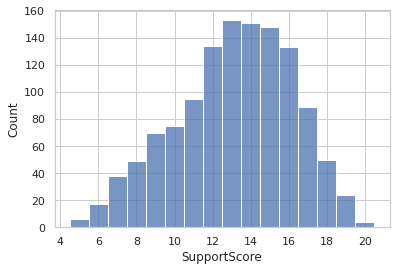

In [56]:
import seaborn as sns
sns.set_theme(style="whitegrid")

histplot = sns.histplot(x="SupportScore", discrete=True, data=Pre_Updated)

## Using a JOIN to Recode Pre

In [83]:
Pre = pd.read_csv("/content/sample_data/PreSurveys.csv") 

Taking a look at the orginal dataframe.

In [84]:
Pre

,RowID,Date,surveyLinkID,Q1_1,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q3_13,Q3_14,Q3_15,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5
0,1,2/10/21,VRYHEBJPSQBG,Sometimes,To a very small extent,To a large extent,Somewhat,A small part of the time,A small part of the time,A small part of the time,A large part of the time,Part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A large part of the time,A small part of the time,Part of the time,A large part of the time,Yes,Yes,Yes,No,No
1,2,2/10/21,GNSIGOXQBCXM,Sometimes,Somewhat,To a large extent,Somewhat,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A small part of the time,Part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,No,No,Yes,Yes,No
2,3,2/10/21,XGXMSAAEUYUC,Seldom,To a small extent,To a very large extent,To a very large extent,A large part of the time,Part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,A large part of the time,No,No,No,Yes,Yes
3,4,2/10/21,HTSURSVFKMAR,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,Not at all,A small part of the time,Part of the time,A small part of the time,A small part of the time,Not at all,Not at all,Part of the time,A small part of the time,Part of the time,No,No,No,No,No
4,5,2/10/21,EFHWQFAWLUEY,Seldom,To a small extent,Somewhat,Somewhat,A large part of the time,A large part of the time,A small part of the time,A large part of the time,A large part of the time,A small part of the time,A small part of the time,Not at all,A small part of the time,A small part of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,Part of the time,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1251,3/9/21,TLRSUEVRUEWK,Sometimes,To a large extent,To a large extent,Somewhat,A small part of the time,A large part of the time,Not at all,A small part of the time,A small part of the time,A small part of the time,Part of the time,A small part of the time,A large part of the time,A small part of the time,Not at all,Not at all,A small part of the time,A large part of the time,Not at all,No,No,No,No,No
1251,1252,3/9/21,RRNKLCQLIWPT,Often,To a large extent,To a small extent,To a small extent,A large part of the time,A large part of the time,Part of the time,A large part of the time,All of the time,Part of the time,Part of the time,A small part of the time,A large part of the time,All of the time,A large part of the time,A large part of the time,A large part of the time,All of the time,Part of the time,No,Yes,Yes,Yes,No
1252,1253,3/9/21,FFFSOUWSFSWA,Seldom,To a very large extent,Somewhat,To a large extent,Part of the time,Not at all,Part of the time,Not at all,A small part of the time,Part of the time,Part of the time,Part of the time,A small part of the time,Not at all,A large part of the time,Part of the time,A small part of the time,Not at all,A small part of the time,No,Yes,No,No,No
1253,1254,3/9/21,QYSIUBDVXSXW,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,I do not have a supervisor,A small part of the time,Part of the time,Not at all,A small part of the time,A small part of the time,Not at all,Part of the time,A large part of the time,Not at all,Part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A small part of t

Next, we will <strong>gather</strong> all the response columns into a single column.  When conducting this gather, the field names will need to be included to separate the responses from one question from another.

In [89]:
Pre_Stacked = (
                Pre
               >> gather('Question_SubQuestion', 'Response',[X.Q1_1,
                                                 X.Q2_1,X.Q2_2,X.Q2_3,
                                                 X.Q3_1,X.Q3_2,X.Q3_3,X.Q3_4,X.Q3_5,X.Q3_6,X.Q3_7,X.Q3_8,X.Q3_9,X.Q3_10,X.Q3_11,X.Q3_12,X.Q3_13,X.Q3_14,X.Q3_15,
                                                 X.Q4_1,X.Q4_2,X.Q4_3,X.Q4_4,X.Q4_5
                                                 ])
              )
Pre_Stacked


,RowID,Date,surveyLinkID,Question_SubQuestion,Response
0,1,2/10/21,VRYHEBJPSQBG,Q1_1,Sometimes
1,2,2/10/21,GNSIGOXQBCXM,Q1_1,Sometimes
2,3,2/10/21,XGXMSAAEUYUC,Q1_1,Seldom
3,4,2/10/21,HTSURSVFKMAR,Q1_1,Sometimes
4,5,2/10/21,EFHWQFAWLUEY,Q1_1,Seldom
...,...,...,...,...,...
30115,1251,3/9/21,TLRSUEVRUEWK,Q4_5,No
30116,1252,3/9/21,RRNKLCQLIWPT,Q4_5,No
30117,1253,3/9/21,FFFSOUWSFSWA,Q4_5,No
30118,1254,3/9/21,QYSIUBDVXSXW,Q4_5,No


Next, use the <strong>str.split()</strong> function to split the Question_SubQuestion variable apart.

In [111]:
Pre_Stacked_Updated = (
                        Pre_Stacked
                        >> mutate(Question = (X.Question_SubQuestion
                                               .str.split("_")
                                               .str[0]
                                             )
                                 )
                      )
Pre_Stacked_Updated

,RowID,Date,surveyLinkID,Question_SubQuestion,Response,Question
0,1,2/10/21,VRYHEBJPSQBG,Q1_1,Sometimes,Q1
1,2,2/10/21,GNSIGOXQBCXM,Q1_1,Sometimes,Q1
2,3,2/10/21,XGXMSAAEUYUC,Q1_1,Seldom,Q1
3,4,2/10/21,HTSURSVFKMAR,Q1_1,Sometimes,Q1
4,5,2/10/21,EFHWQFAWLUEY,Q1_1,Seldom,Q1
...,...,...,...,...,...,...
30115,1251,3/9/21,TLRSUEVRUEWK,Q4_5,No,Q4
30116,1252,3/9/21,RRNKLCQLIWPT,Q4_5,No,Q4
30117,1253,3/9/21,FFFSOUWSFSWA,Q4_5,No,Q4
30118,1254,3/9/21,QYSIUBDVXSXW,Q4_5,No,Q4


For Q4, the correct coding should include the subquestion.  Consider the following code that fixes the issues with Q4 and retains the subquestion portion as needed.

In [112]:
Pre_Stacked_Updated = (
                        Pre_Stacked_Updated
                        >> mutate(QuestionFix = if_else( X.Question_SubQuestion.str.split("_").str[0] == "Q4",
                                                        X.Question_SubQuestion,
                                                        X.Question_SubQuestion.str.split("_").str[0]   
                                                    )
                                 )
                      )
Pre_Stacked_Updated

,RowID,Date,surveyLinkID,Question_SubQuestion,Response,Question,QuestionFix
0,1,2/10/21,VRYHEBJPSQBG,Q1_1,Sometimes,Q1,Q1
1,2,2/10/21,GNSIGOXQBCXM,Q1_1,Sometimes,Q1,Q1
2,3,2/10/21,XGXMSAAEUYUC,Q1_1,Seldom,Q1,Q1
3,4,2/10/21,HTSURSVFKMAR,Q1_1,Sometimes,Q1,Q1
4,5,2/10/21,EFHWQFAWLUEY,Q1_1,Seldom,Q1,Q1
...,...,...,...,...,...,...,...
30115,1251,3/9/21,TLRSUEVRUEWK,Q4_5,No,Q4,Q4_5
30116,1252,3/9/21,RRNKLCQLIWPT,Q4_5,No,Q4,Q4_5
30117,1253,3/9/21,FFFSOUWSFSWA,Q4_5,No,Q4,Q4_5
30118,1254,3/9/21,QYSIUBDVXSXW,Q4_5,No,Q4,Q4_5


Next, we will concatenate the Question and Response fields into a single column to match the Question_Scoring table.

In [113]:
Pre_Stacked_Updated = (
                        Pre_Stacked_Updated
                        >> mutate(Q_Response = X.QuestionFix + '_' + X.Response)
                      )
Pre_Stacked_Updated

,RowID,Date,surveyLinkID,Question_SubQuestion,Response,Question,QuestionFix,Q_Response
0,1,2/10/21,VRYHEBJPSQBG,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes
1,2,2/10/21,GNSIGOXQBCXM,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes
2,3,2/10/21,XGXMSAAEUYUC,Q1_1,Seldom,Q1,Q1,Q1_Seldom
3,4,2/10/21,HTSURSVFKMAR,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes
4,5,2/10/21,EFHWQFAWLUEY,Q1_1,Seldom,Q1,Q1,Q1_Seldom
...,...,...,...,...,...,...,...,...
30115,1251,3/9/21,TLRSUEVRUEWK,Q4_5,No,Q4,Q4_5,Q4_5_No
30116,1252,3/9/21,RRNKLCQLIWPT,Q4_5,No,Q4,Q4_5,Q4_5_No
30117,1253,3/9/21,FFFSOUWSFSWA,Q4_5,No,Q4,Q4_5,Q4_5_No
30118,1254,3/9/21,QYSIUBDVXSXW,Q4_5,No,Q4,Q4_5,Q4_5_No


### Get the Question Scoring Table

In [114]:
Question_Scoring = pd.read_csv("/content/sample_data/Question_Scoring.csv") 

Making sure the Question Scoring table was read in correctly.

In [115]:
Question_Scoring

,Question,Response,Q_Response,Score
0,Q1,Always,Q1_Always,5.0
1,Q1,Often,Q1_Often,4.0
2,Q1,Sometimes,Q1_Sometimes,3.0
3,Q1,Seldom,Q1_Seldom,2.0
4,Q1,Hardly Ever,Q1_Hardly Ever,1.0
5,Q1,I do not have a supervisor,Q1_I do not have a supervisor,NaN
6,Q2,To a very large extent,Q2_To a very large extent,5.0
7,Q2,To a large extent,Q2_To a large extent,4.0
8,Q2,Somewhat,Q2_Somewhat,3.0
9,Q2,To a small extent,Q2_To a small extent,2.0


### Complete the JOIN for Pre

In [121]:
Pre_Stacked_withScores = (
                            Pre_Stacked_Updated
                            >> left_join(Question_Scoring, by='Q_Response')
                            >> select(X.RowID, X.surveyLinkID,X.Question_SubQuestion,X.Response_x,X.Question_x,X.QuestionFix,X.Q_Response,X.Score)
                            >> rename(Response = X.Response_x,Question = X.Question_x)
                          )
Pre_Stacked_withScores

,RowID,surveyLinkID,Question_SubQuestion,Response,Question,QuestionFix,Q_Response,Score
0,1,VRYHEBJPSQBG,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes,3.0
1,2,GNSIGOXQBCXM,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes,3.0
2,3,XGXMSAAEUYUC,Q1_1,Seldom,Q1,Q1,Q1_Seldom,2.0
3,4,HTSURSVFKMAR,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes,3.0
4,5,EFHWQFAWLUEY,Q1_1,Seldom,Q1,Q1,Q1_Seldom,2.0
...,...,...,...,...,...,...,...,...
30115,1251,TLRSUEVRUEWK,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0
30116,1252,RRNKLCQLIWPT,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0
30117,1253,FFFSOUWSFSWA,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0
30118,1254,QYSIUBDVXSXW,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0


### Getting the Overall Scores for Pre

Getting the total score for each question for each person.


In [122]:
Pre_Scores = (
              Pre_Stacked_withScores
              >> group_by(X.surveyLinkID,X.Question)
              >> summarize(Score = X.Score.sum())
              )
Pre_Scores

,Question,surveyLinkID,Score
0,Q1,ABASIQJSRFGA,2.0
1,Q2,ABASIQJSRFGA,10.0
2,Q3,ABASIQJSRFGA,17.0
3,Q4,ABASIQJSRFGA,0.0
4,Q1,ABEPJDQHOQDM,4.0
...,...,...,...
5015,Q4,YXTLUBNNQVIX,2.0
5016,Q1,YYXUAMCEAQNT,3.0
5017,Q2,YYXUAMCEAQNT,12.0
5018,Q3,YYXUAMCEAQNT,21.0


Finally, use <strong>seperate</strong> to put back into individual columns.

In [129]:
Pre_Scores_Wide = (
                    Pre_Scores
                    >> mutate(Time_Question = "Pre_" + X.Question)
                    >> select(~X.Question) 
                    >> spread(X.Time_Question, X.Score)      

                 )

Pre_Scores_Wide

,surveyLinkID,Pre_Q1,Pre_Q2,Pre_Q3,Pre_Q4
0,ABASIQJSRFGA,2.0,10.0,17.0,0.0
1,ABEPJDQHOQDM,4.0,10.0,37.0,3.0
2,ABTVNASQBFMK,0.0,0.0,54.0,4.0
3,ACIMNUQCAQTG,1.0,11.0,51.0,3.0
4,ACIQVRFTUDDV,2.0,13.0,47.0,4.0
...,...,...,...,...,...
1250,YWXEBJPNHDXC,5.0,15.0,31.0,1.0
1251,YXKDSKVXXPCR,4.0,13.0,35.0,1.0
1252,YXNJUCBDETYC,5.0,11.0,43.0,2.0
1253,YXTLUBNNQVIX,5.0,11.0,38.0,2.0


## Using JOIN to Recode Post

In [131]:
Post = pd.read_csv("/content/sample_data/PostSurveys.csv") 

Looking at the original Post dataframe.

In [132]:
Post

,RowID,Date,surveyLinkID,Q1_1,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q3_13,Q3_14,Q3_15,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5
0,1,3/18/21,VRYHEBJPSQBG,Always,To a large extent,To a very large extent,To a very large extent,A small part of the time,Not at all,A small part of the time,Part of the time,Not at all,Not at all,A small part of the time,Not at all,A small part of the time,Part of the time,Not at all,Not at all,Not at all,Part of the time,A small part of the time,No,No,No,No,No
1,2,3/18/21,GNSIGOXQBCXM,Often,To a very small extent,To a large extent,To a small extent,A small part of the time,A large part of the time,A large part of the time,Part of the time,Part of the time,A large part of the time,A large part of the time,A small part of the time,Part of the time,Part of the time,A large part of the time,Part of the time,A small part of the time,All of the time,Part of the time,Yes,Yes,Yes,No,No
2,3,3/18/21,HTSURSVFKMAR,Sometimes,To a very large extent,Somewhat,Somewhat,A small part of the time,A small part of the time,Not at all,Part of the time,Not at all,Not at all,A small part of the time,A small part of the time,Part of the time,A small part of the time,Not at all,Part of the time,A small part of the time,Part of the time,A small part of the time,Yes,No,No,No,No
3,4,3/18/21,MHQOJTTAUVSL,Always,Somewhat,To a very large extent,To a very large extent,A small part of the time,A large part of the time,Not at all,A small part of the time,Part of the time,A small part of the time,Part of the time,Not at all,Part of the time,Part of the time,Part of the time,Not at all,A large part of the time,Not at all,A small part of the time,No,No,No,No,No
4,5,3/18/21,EFHWQFAWLUEY,Often,To a very large extent,To a large extent,To a large extent,A large part of the time,A large part of the time,A small part of the time,Part of the time,A large part of the time,Part of the time,A small part of the time,Part of the time,A small part of the time,A large part of the time,A small part of the time,Part of the time,A small part of the time,A large part of the time,A large part of the time,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,919,4/17/21,IEFCTGBUUIEH,Often,Somewhat,Somewhat,Somewhat,A small part of the time,Part of the time,Not at all,Not at all,Not at all,Part of the time,A large part of the time,Not at all,Not at all,Not at all,A small part of the time,Part of the time,A small part of the time,Part of the time,A small part of the time,No,No,Yes,No,No
919,920,4/17/21,TLRSUEVRUEWK,Always,To a small extent,Somewhat,Somewhat,A large part of the time,A small part of the time,Part of the time,Part of the time,Not at all,A large part of the time,A large part of the time,A large part of the time,Part of the time,A large part of the time,A small part of the time,A large part of the time,Not at all,Part of the time,A small part of the time,No,Yes,Yes,No,No
920,921,4/17/21,RRNKLCQLIWPT,Sometimes,Somewhat,Somewhat,To a very large extent,Part of the time,A large part of the time,A large part of the time,A small part of the time,A small part of the time,Part of the time,Part of the time,Part of the time,A large part of the time,A small part of the time,A small part of the time,A large part of the time,A large part of the time,All of the time,A large part of the time,No,No,Yes,Yes,No
921,922,4/17/21,FFFSOUWSFSWA,Sometimes,To a large extent,Somewhat,To a very large extent,Part of the time,Part of the time,A small part of the time,A large part of the time,A large part of the time,A small part of the time,A small part of the time,A small part of the time,A small part of the time,A small part of the time,A small part of the time,A small part of the time,A small part of the time,A small part of the time,Part of the time,No,No,No,Yes,No


First, we will use <strong>gather()</strong> to stack the responses into a single column.

In [133]:
Post_Stacked = (
                Post
               >> gather('Question_SubQuestion', 'Response',[X.Q1_1,
                                                 X.Q2_1,X.Q2_2,X.Q2_3,
                                                 X.Q3_1,X.Q3_2,X.Q3_3,X.Q3_4,X.Q3_5,X.Q3_6,X.Q3_7,X.Q3_8,X.Q3_9,X.Q3_10,X.Q3_11,X.Q3_12,X.Q3_13,X.Q3_14,X.Q3_15,
                                                 X.Q4_1,X.Q4_2,X.Q4_3,X.Q4_4,X.Q4_5
                                                 ])
              )
Post_Stacked

,RowID,Date,surveyLinkID,Question_SubQuestion,Response
0,1,3/18/21,VRYHEBJPSQBG,Q1_1,Always
1,2,3/18/21,GNSIGOXQBCXM,Q1_1,Often
2,3,3/18/21,HTSURSVFKMAR,Q1_1,Sometimes
3,4,3/18/21,MHQOJTTAUVSL,Q1_1,Always
4,5,3/18/21,EFHWQFAWLUEY,Q1_1,Often
...,...,...,...,...,...
22147,919,4/17/21,IEFCTGBUUIEH,Q4_5,No
22148,920,4/17/21,TLRSUEVRUEWK,Q4_5,No
22149,921,4/17/21,RRNKLCQLIWPT,Q4_5,No
22150,922,4/17/21,FFFSOUWSFSWA,Q4_5,No


Next, create the Question and QuestionFix fields to prepare for the upcoming JOIN with the Question Scoring table.

In [137]:
Post_Stacked_Updated = (
                        Post_Stacked
                        >> mutate(Question = (X.Question_SubQuestion
                                               .str.split("_")
                                               .str[0]
                                             )
                                 )
                        >> mutate(QuestionFix = if_else( X.Question_SubQuestion.str.split("_").str[0] == "Q4",
                                                        X.Question_SubQuestion,
                                                        X.Question_SubQuestion.str.split("_").str[0]   
                                                    )
                                 )
                        >> mutate(Q_Response = X.QuestionFix + '_' + X.Response)
                      )
Post_Stacked_Updated

,RowID,Date,surveyLinkID,Question_SubQuestion,Response,Question,QuestionFix,Q_Response
0,1,3/18/21,VRYHEBJPSQBG,Q1_1,Always,Q1,Q1,Q1_Always
1,2,3/18/21,GNSIGOXQBCXM,Q1_1,Often,Q1,Q1,Q1_Often
2,3,3/18/21,HTSURSVFKMAR,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes
3,4,3/18/21,MHQOJTTAUVSL,Q1_1,Always,Q1,Q1,Q1_Always
4,5,3/18/21,EFHWQFAWLUEY,Q1_1,Often,Q1,Q1,Q1_Often
...,...,...,...,...,...,...,...,...
22147,919,4/17/21,IEFCTGBUUIEH,Q4_5,No,Q4,Q4_5,Q4_5_No
22148,920,4/17/21,TLRSUEVRUEWK,Q4_5,No,Q4,Q4_5,Q4_5_No
22149,921,4/17/21,RRNKLCQLIWPT,Q4_5,No,Q4,Q4_5,Q4_5_No
22150,922,4/17/21,FFFSOUWSFSWA,Q4_5,No,Q4,Q4_5,Q4_5_No


Now, complete the JOIN with the Question Scoring table.

In [138]:
Post_Stacked_withScores = (
                            Post_Stacked_Updated
                            >> left_join(Question_Scoring, by='Q_Response')
                            >> select(X.RowID, X.surveyLinkID,X.Question_SubQuestion,X.Response_x,X.Question_x,X.QuestionFix,X.Q_Response,X.Score)
                            >> rename(Response = X.Response_x,Question = X.Question_x)
                          )
Post_Stacked_withScores

,RowID,surveyLinkID,Question_SubQuestion,Response,Question,QuestionFix,Q_Response,Score
0,1,VRYHEBJPSQBG,Q1_1,Always,Q1,Q1,Q1_Always,5.0
1,2,GNSIGOXQBCXM,Q1_1,Often,Q1,Q1,Q1_Often,4.0
2,3,HTSURSVFKMAR,Q1_1,Sometimes,Q1,Q1,Q1_Sometimes,3.0
3,4,MHQOJTTAUVSL,Q1_1,Always,Q1,Q1,Q1_Always,5.0
4,5,EFHWQFAWLUEY,Q1_1,Often,Q1,Q1,Q1_Often,4.0
...,...,...,...,...,...,...,...,...
22147,919,IEFCTGBUUIEH,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0
22148,920,TLRSUEVRUEWK,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0
22149,921,RRNKLCQLIWPT,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0
22150,922,FFFSOUWSFSWA,Q4_5,No,Q4,Q4_5,Q4_5_No,0.0


Getting the Overall Score for Post.  In addition, create a wide version of the datagframe.

In [141]:
Post_Scores_Wide = (
              Post_Stacked_withScores
              >> group_by(X.surveyLinkID,X.Question)
              >> summarize(Score = X.Score.sum())
              >> mutate(Time_Question = "Post_" + X.Question)
              >> select(~X.Question) 
              >> spread(X.Time_Question, X.Score)  
              )
Post_Scores_Wide

,surveyLinkID,Post_Q1,Post_Q2,Post_Q3,Post_Q4
0,ABASIQJSRFGA,5.0,12.0,27.0,1.0
1,ABEPJDQHOQDM,2.0,14.0,35.0,2.0
2,ABJPDFECSFAI,2.0,9.0,62.0,5.0
3,ABTVNASQBFMK,4.0,12.0,39.0,2.0
4,ACIMNUQCAQTG,5.0,12.0,19.0,0.0
...,...,...,...,...,...
918,YVRDPUQYTGRA,5.0,9.0,28.0,0.0
919,YWBYOEGYETVW,4.0,12.0,24.0,0.0
920,YWXEBJPNHDXC,5.0,15.0,37.0,0.0
921,YXTLUBNNQVIX,4.0,13.0,24.0,0.0


## JOIN Pre to Post

Next, the data from Pre will be JOIN to Post.  This JOIN will be conducted as an outer JOIN as some filled out Pre, but not Post, some filled out Post, but not Pre, and some filled out both.

In [142]:
All_Scores = (
              Pre_Scores_Wide
              >> outer_join(Post_Scores_Wide, by="surveyLinkID")
            )

All_Scores

,surveyLinkID,Pre_Q1,Pre_Q2,Pre_Q3,Pre_Q4,Post_Q1,Post_Q2,Post_Q3,Post_Q4
0,ABASIQJSRFGA,2.0,10.0,17.0,0.0,5.0,12.0,27.0,1.0
1,ABEPJDQHOQDM,4.0,10.0,37.0,3.0,2.0,14.0,35.0,2.0
2,ABTVNASQBFMK,0.0,0.0,54.0,4.0,4.0,12.0,39.0,2.0
3,ACIMNUQCAQTG,1.0,11.0,51.0,3.0,5.0,12.0,19.0,0.0
4,ACIQVRFTUDDV,2.0,13.0,47.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1361,XSYUSOAOPPVK,NaN,NaN,NaN,NaN,4.0,13.0,23.0,0.0
1362,YHOVLHIFATDY,NaN,NaN,NaN,NaN,3.0,11.0,28.0,1.0
1363,YLXISPMWISGE,NaN,NaN,NaN,NaN,5.0,12.0,32.0,1.0
1364,YPKAJDBHLNXT,NaN,NaN,NaN,NaN,5.0,7.0,53.0,4.0


## Change Scores

Next, compute the change scores as appropriate. 

<p align="center">
<font size="+2">Change Score = Post - Pre</font>
</p>

In [145]:
All_Scores = (
                All_Scores
                >> mutate(Change_Q1 = X.Post_Q1 - X.Pre_Q1,
                          Change_Q2 = X.Post_Q2 - X.Pre_Q2,
                          Change_Q3 = X.Post_Q3 - X.Pre_Q3,
                          Change_Q4 = X.Post_Q4 - X.Pre_Q4
                         )
            )
All_Scores


,surveyLinkID,Pre_Q1,Pre_Q2,Pre_Q3,Pre_Q4,Post_Q1,Post_Q2,Post_Q3,Post_Q4,Change_Q1,Change_Q2,Change_Q3,Change_Q4
0,ABASIQJSRFGA,2.0,10.0,17.0,0.0,5.0,12.0,27.0,1.0,3.0,2.0,10.0,1.0
1,ABEPJDQHOQDM,4.0,10.0,37.0,3.0,2.0,14.0,35.0,2.0,-2.0,4.0,-2.0,-1.0
2,ABTVNASQBFMK,0.0,0.0,54.0,4.0,4.0,12.0,39.0,2.0,4.0,12.0,-15.0,-2.0
3,ACIMNUQCAQTG,1.0,11.0,51.0,3.0,5.0,12.0,19.0,0.0,4.0,1.0,-32.0,-3.0
4,ACIQVRFTUDDV,2.0,13.0,47.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,XSYUSOAOPPVK,NaN,NaN,NaN,NaN,4.0,13.0,23.0,0.0,NaN,NaN,NaN,NaN
1362,YHOVLHIFATDY,NaN,NaN,NaN,NaN,3.0,11.0,28.0,1.0,NaN,NaN,NaN,NaN
1363,YLXISPMWISGE,NaN,NaN,NaN,NaN,5.0,12.0,32.0,1.0,NaN,NaN,NaN,NaN
1364,YPKAJDBHLNXT,NaN,NaN,NaN,NaN,5.0,7.0,53.0,4.0,NaN,NaN,NaN,NaN


Getting the average change score for each question.

In [155]:
(
    All_Scores
    >> select(X.Change_Q1, X.Change_Q2, X.Change_Q3, X.Change_Q4)
    >> gather('Question', 'Score', [X.Change_Q1,X.Change_Q2,X.Change_Q3,X.Change_Q4])
    >> group_by(X.Question)
    >> summarize(Mean = X.Score.mean())
)

,Question,Mean
0,Change_Q1,0.554187
1,Change_Q2,0.763547
2,Change_Q3,-4.592365
3,Change_Q4,-0.732759


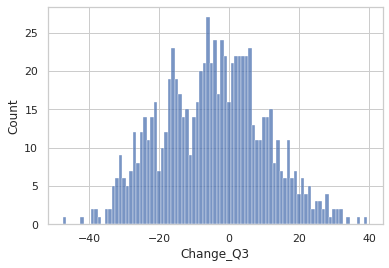

In [180]:
#Histogram of Change Scores
histplot = sns.histplot(x="Change_Q3", discrete=True, data=All_Scores)

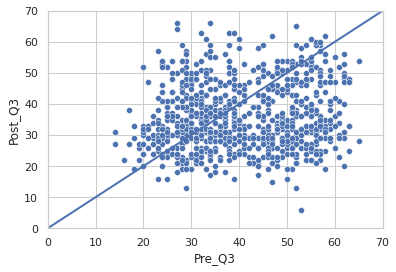

In [170]:
import matplotlib.pyplot as plt

xyplot = sns.scatterplot(x="Pre_Q3", y="Post_Q3", data=All_Scores)

# control x and y limits
plt.ylim(0, 70)
plt.xlim(0, 70)

plt.plot([0, 70], [0, 70], linewidth=2)

plt.show()



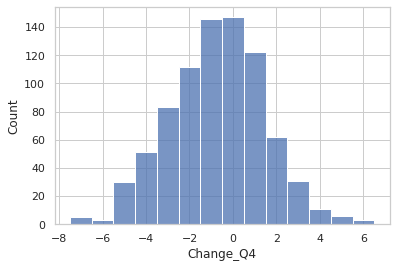

In [181]:
#Histogram of Change Scores for Violence
histplot = sns.histplot(x="Change_Q4", discrete=True, data=All_Scores)

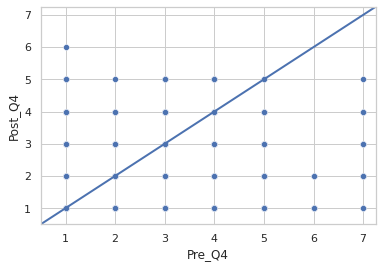

In [178]:

xyplot = sns.scatterplot(x="Pre_Q4", y="Post_Q4", data=All_Scores)

# control x and y limits
plt.ylim(0.5, 7.25)
plt.xlim(0.5, 7.25)

plt.plot([0, 8], [0, 8], linewidth=2)

plt.show()

In [158]:
All_Scores.Post_Q3.corr(All_Scores.Pre_Q3)

0.11614316224503883

In [174]:
All_Scores.Post_Q4.corr(All_Scores.Pre_Q4)

0.04434504331980882

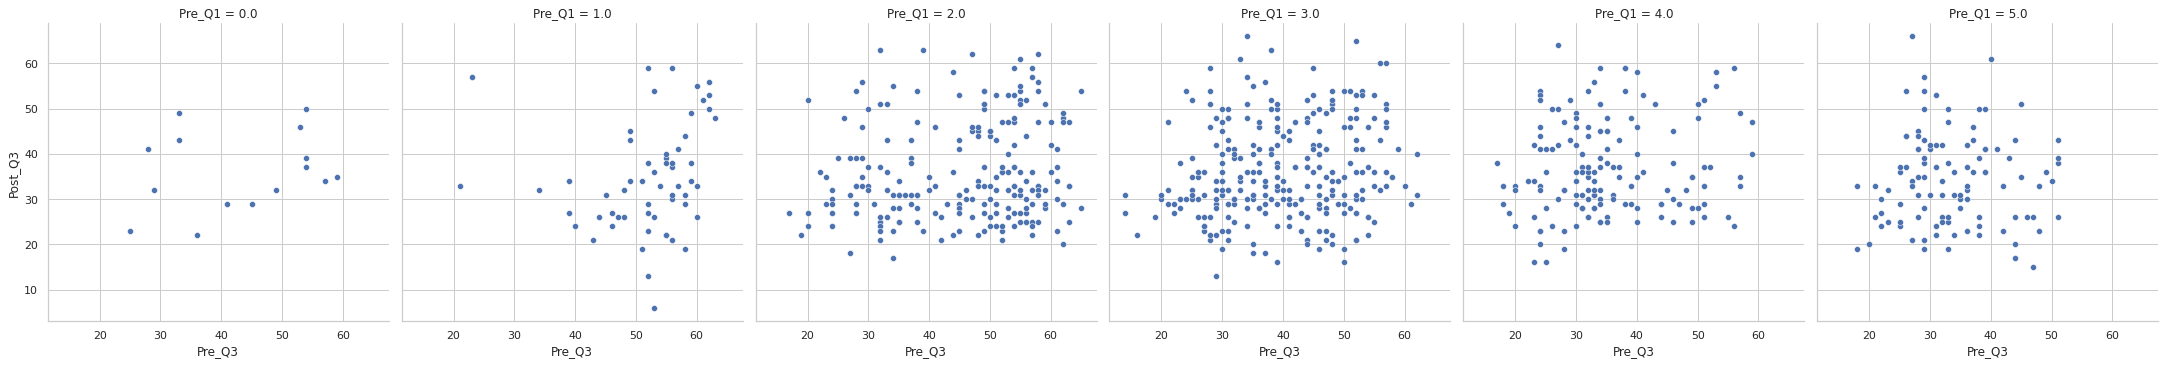

In [159]:
sns.relplot(
    data=All_Scores, x="Pre_Q3", y="Post_Q3",
    col="Pre_Q1", 
    kind="scatter"
)